## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

Done


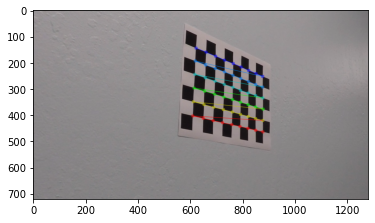

In [112]:
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import moviepy as mve

%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img2 = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)

        
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
undstor = cv2.undistort(img, mtx, dist, None, mtx)
#M = cv2.getPerspectiveTransform(src, dst)
cv2.destroyAllWindows()
print('Done')
plt.imshow(undstor)
plt.show()

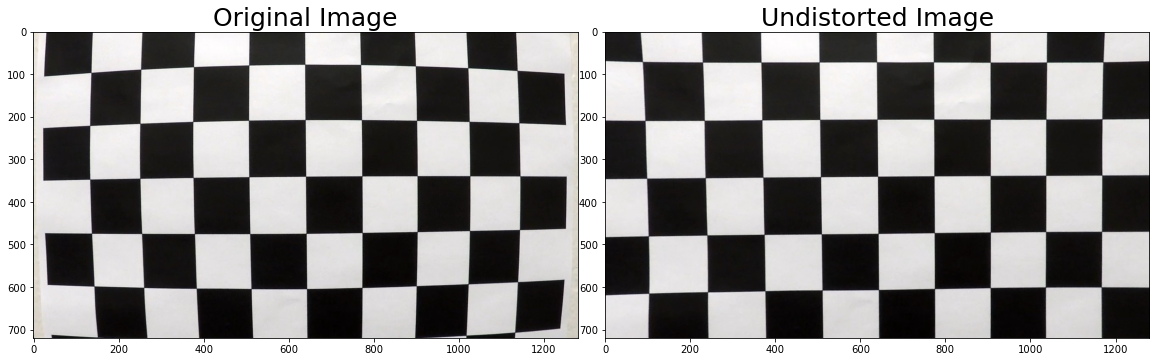

In [118]:
    # Test the calibration on the first calibration image 
    
    mpimg.imread("../camera_cal/calibration1.jpg")

    img = mpimg.imread("../camera_cal/calibration1.jpg")

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)


    undstor = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Plot Original and Undistorted Test Image
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = .2, wspace=.05)

# Plot Original Test Image
plt.subplot(1,2,1)
plt.title('Original Image', fontsize=25)
fig =plt.imshow(img)

# Plot Undistorted Test Image
plt.subplot(1,2,2)
plt.title('Undistorted Image', fontsize=25)
fig =plt.imshow(undstor)
    
    

## And so on and so forth...

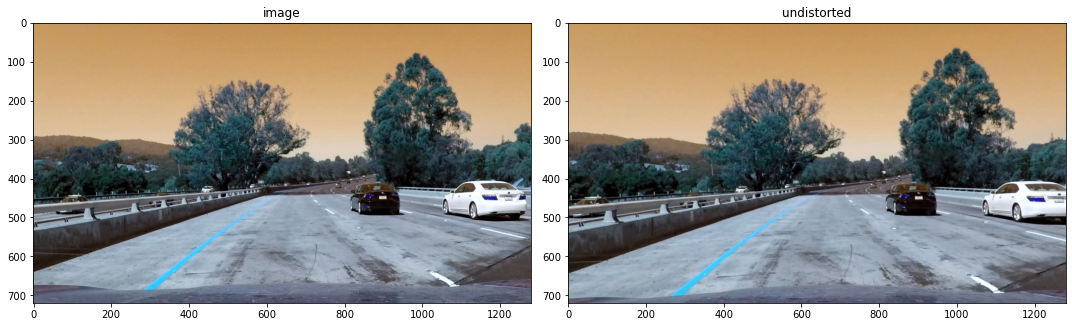

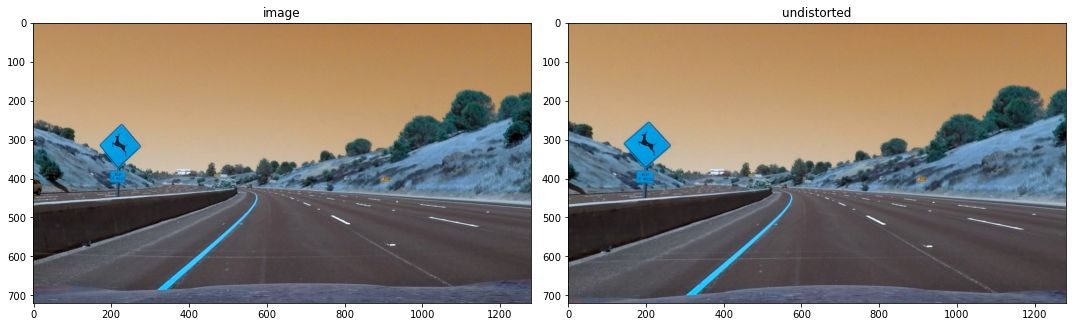

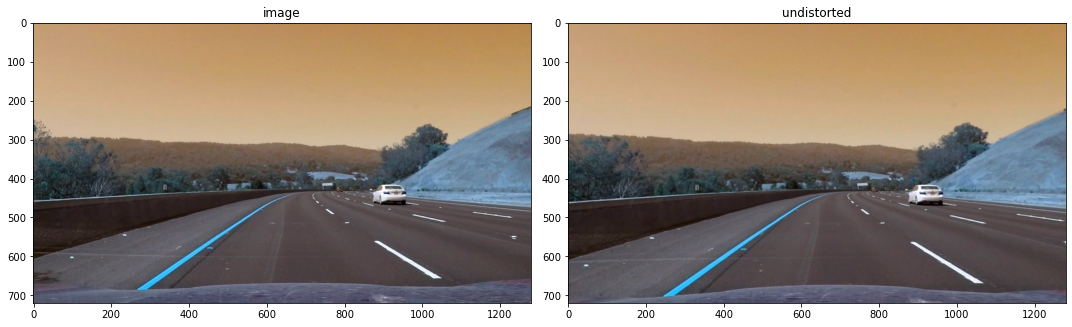

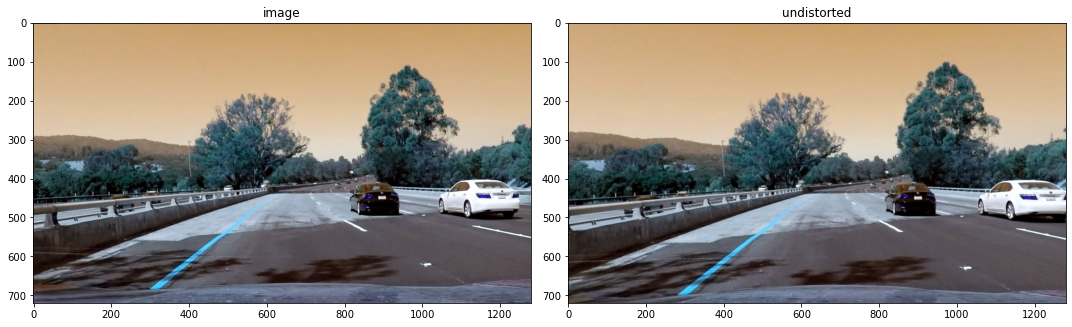

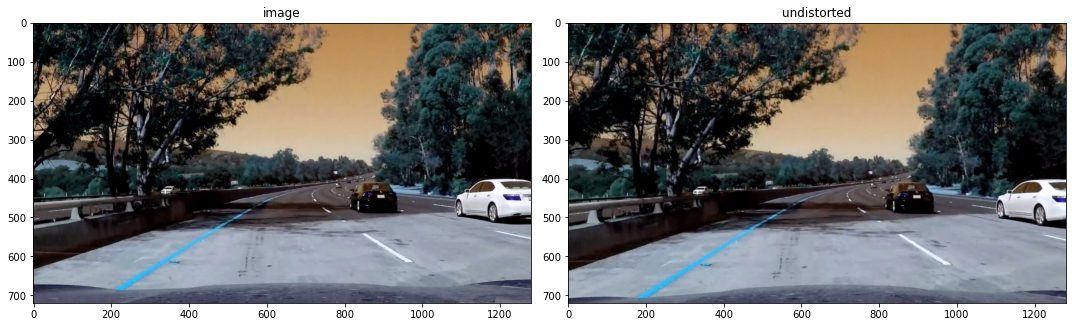

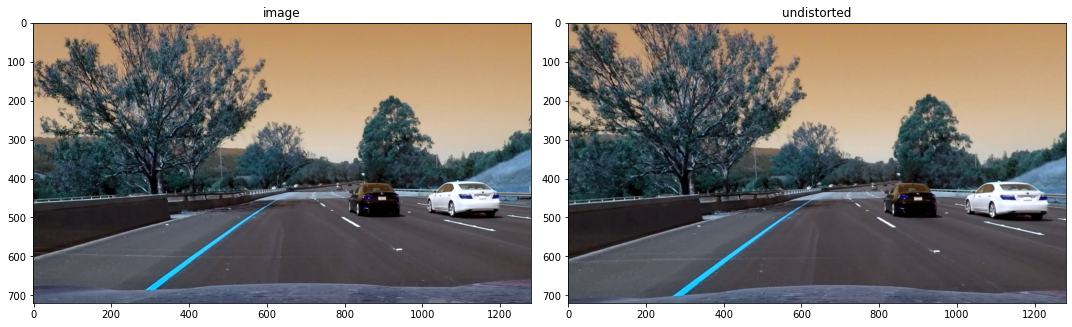

In [119]:
images2 = glob.glob('../test_images/test*.jpg')

for fname in images2:
    img = cv2.imread(fname)
    undstor = cv2.undistort(img, mtx, dist, None, mtx)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    #fig.suptitle('Image Vs undistorted')

    ax1.imshow(img)
    ax1.set_title('image')

    ax2.imshow(undstor)
    ax2.set_title('undistorted')
    fig.tight_layout() # adjusts spacing between subplots